In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use("default")
plt.rcParams["figure.figsize"] = (10,6)


In [29]:
import os
os.listdir()



['.git', 'amz_uk_price_prediction_dataset.csv', 'README.md', 'Solution.ipynb']

In [30]:
# Ajusta el nombre si es diferente
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df.head()



,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [31]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [32]:
category_counts = df['category'].value_counts()
category_counts.head(10)


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Name: count, dtype: int64

In [33]:
top_5_categories = category_counts.head(5)
top_5_categories


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

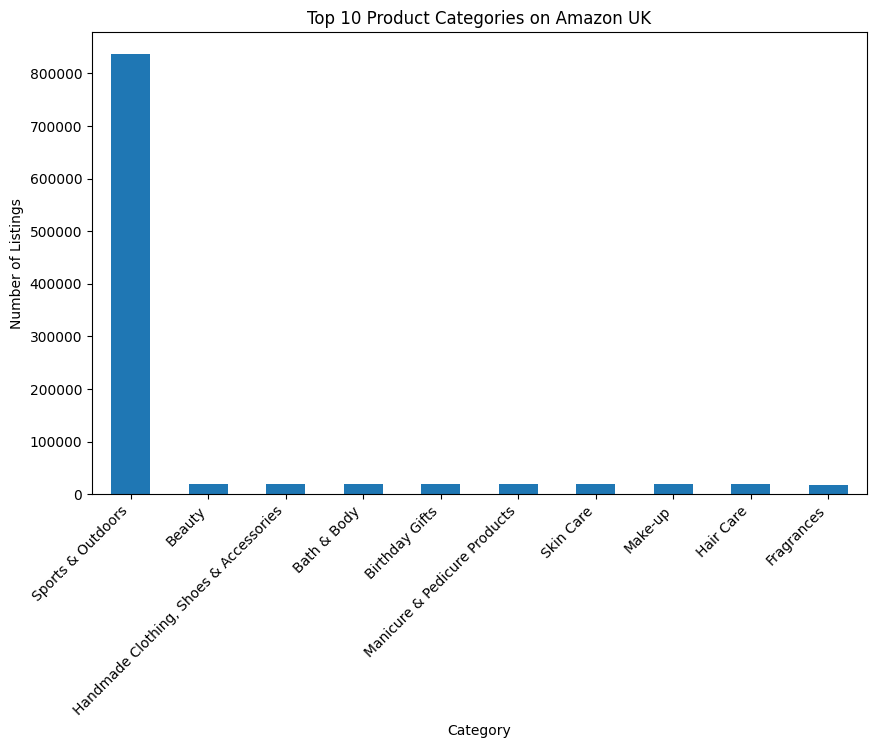

In [34]:
top_10_categories = category_counts.head(10)

top_10_categories.plot(kind='bar')
plt.title("Top 10 Product Categories on Amazon UK")
plt.xlabel("Category")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha='right')
plt.show()


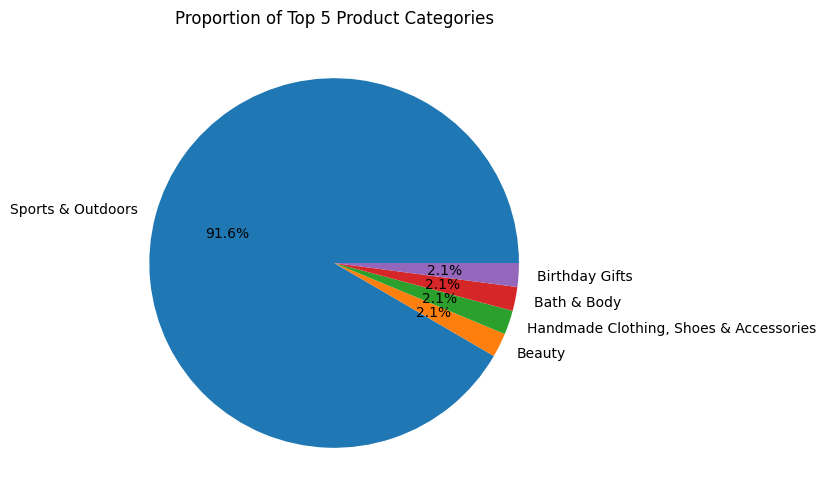

In [35]:
top_5_categories.plot(kind='pie', autopct='%1.1f%%')
plt.title("Proportion of Top 5 Product Categories")
plt.ylabel("")
plt.show()


In [36]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])


In [37]:
price_mean = df['price'].mean()
price_median = df['price'].median()
price_mode = df['price'].mode()[0]

price_mean, price_median, price_mode


(np.float64(89.24380943923661), np.float64(19.09), np.float64(9.99))

In [38]:
price_variance = df['price'].var()
price_std = df['price'].std()
price_range = df['price'].max() - df['price'].min()
price_iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)

price_variance, price_std, price_range, price_iqr


(np.float64(119445.48532254901),
 np.float64(345.60886175349873),
 np.float64(100000.0),
 np.float64(36.0))

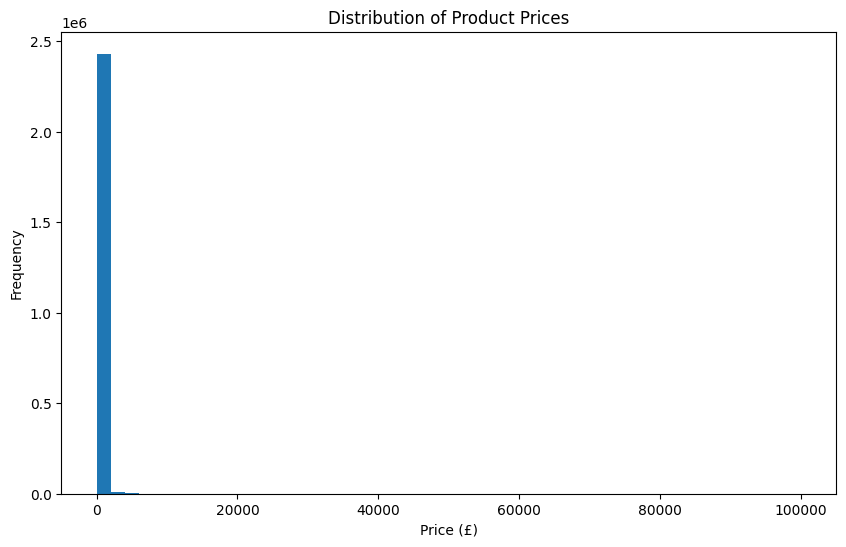

In [39]:
plt.hist(df['price'], bins=50)
plt.title("Distribution of Product Prices")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.show()


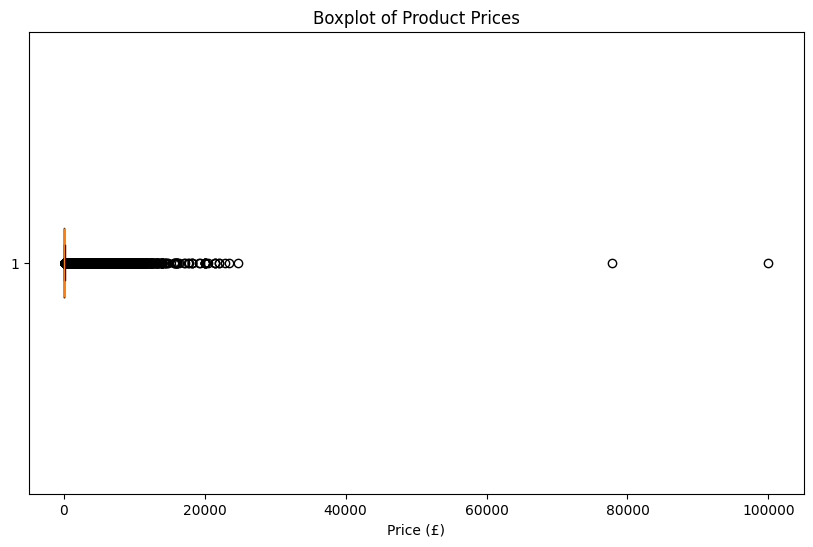

In [40]:
plt.boxplot(df['price'], vert=False)
plt.title("Boxplot of Product Prices")
plt.xlabel("Price (£)")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB
None
                uid         stars       reviews         price  \
count  2.443651e+06  2.443651e+06  2.443651e+06  2.443651e+06   
mean   1.370545e+06  2.152836e+00  4.806278e+02  8.924381e+01   
std    8.160562e+05  2.194865e+00  5.944124e+03  3.456089e+02   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.589215e+05  0.000000e+00  0.000000e+00  9.990000e+00   
50%    1.349029e+06  0.000000e+00  0.000000e+00  1.909000e+01   
75%

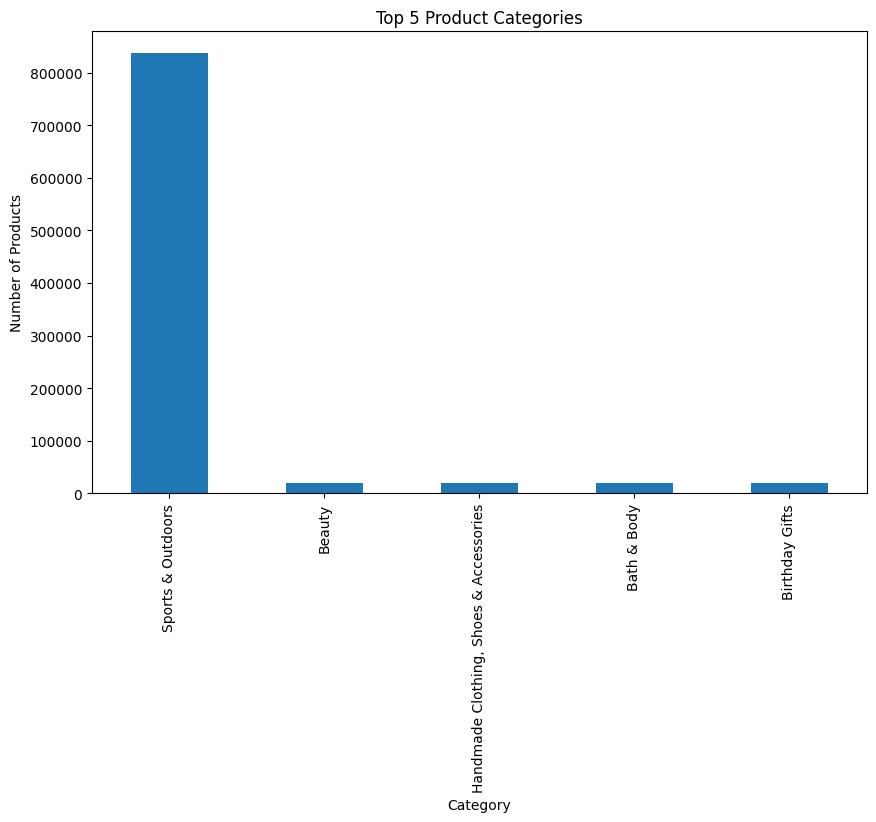

NameError: name 'top_categories_' is not defined

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el CSV
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

# Convertir stars y price a numérico
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Eliminar filas sin stars ni price
df = df.dropna(subset=['stars', 'price'])

# Estadísticas generales
print(df.info())
print(df.describe())

# --- Parte 1: Product Categories ---
# Top 5 categorías más frecuentes
top_categories = df['category'].value_counts().head(5)
print(top_categories)

# Bar chart
top_categories.plot(kind='bar', title="Top 5 Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.show()

# Pie chart
top_categories_



In [ ]:
df.columns


Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [ ]:
rating_mean = df['rating'].mean()
rating_median = df['rating'].median()
rating_mode = df['rating'].mode()[0]

rating_mean, rating_median, rating_mode


In [ ]:
rating_variance = df['rating'].var()
rating_std = df['rating'].std()
rating_iqr = df['rating'].quantile(0.75) - df['rating'].quantile(0.25)

rating_variance, rating_std, rating_iqr


In [ ]:
rating_skewness = df['rating'].skew()
rating_kurtosis = df['rating'].kurtosis()

rating_skewness, rating_kurtosis


In [45]:
# Skewness y kurtosis
rating_skewness = df['stars'].skew()
rating_kurtosis = df['stars'].kurtosis()

print(rating_skewness, rating_kurtosis)



0.08120735761080881 -1.9260061280432994


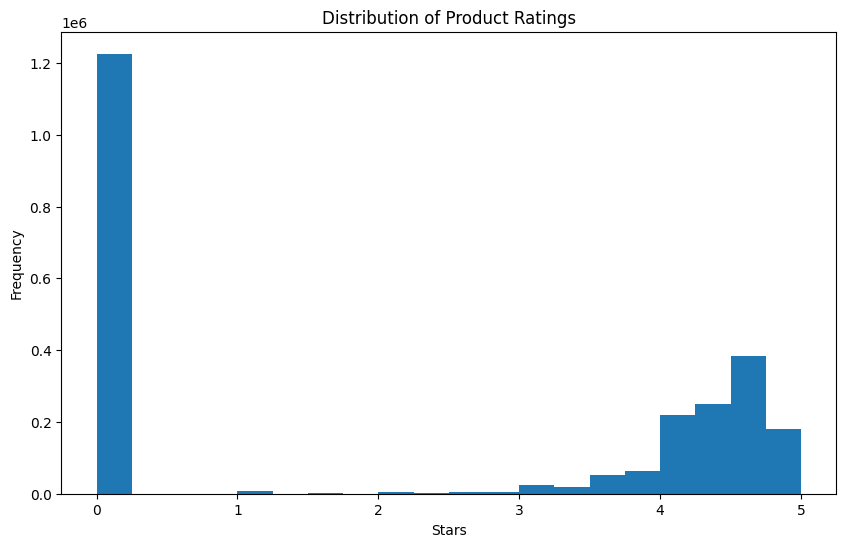

In [44]:
plt.hist(df['stars'], bins=20)
plt.title("Distribution of Product Ratings")
plt.xlabel("Stars")
plt.ylabel("Frequency")
plt.show()

